In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve

In [2]:
exp1 = pd.read_csv("/Users/taraapple/Downloads/EEG/experiment1.csv")
exp2 = pd.read_csv("/Users/taraapple/Downloads/EEG/experiment2.csv")
exp3 = pd.read_csv("/Users/taraapple/Downloads/EEG/experiment3.csv")

In [3]:
exp1 = exp1.iloc[: , 1:]
exp2 = exp2.iloc[: , 1:]
exp3 = exp3.iloc[: , 1:]

In [4]:
data = exp1.append(exp2)
data = data.append(exp3)

In [5]:
data

,Unnamed: 0.1,channel1band1,channel1band2,channel1band3,channel1band4,channel1band5,channel2band1,channel2band2,channel2band3,channel2band4,...,channel61band2,channel61band3,channel61band4,channel61band5,channel62band1,channel62band2,channel62band3,channel62band4,channel62band5,labels
0,R1_1_1_1,27.690652,23.304470,20.474486,18.149782,16.915249,27.638452,23.265017,20.374759,18.078391,...,21.198713,19.602451,18.140681,17.188848,26.162447,21.669390,19.941876,18.365300,16.996037,1.0
1,R1_1_1_2,27.681841,23.291268,20.472048,18.150560,16.911664,27.625786,23.250357,20.371480,18.079903,...,21.196372,19.596705,18.143698,17.186763,26.150286,21.664427,19.935365,18.367731,16.993784,1.0
2,R1_1_1_3,27.675038,23.281910,20.470404,18.152180,16.908828,27.617062,23.238733,20.368917,18.082122,...,21.194650,19.591578,18.146817,17.184404,26.137390,21.660778,19.929424,18.369899,16.991492,1.0
3,R1_1_1_4,27.672559,23.276374,20.467976,18.154491,16.905816,27.612179,23.231146,20.365556,18.085136,...,21.193662,19.585244,18.149587,17.183173,26.129884,21.657364,19.922379,18.371922,16.990375,1.0
4,R1_1_1_5,27.671900,23.272510,20.466660,18.156205,16.903495,27.608150,23.225059,20.363426,18.087604,...,21.191194,19.579062,18.152204,17.182695,26.125392,21.652414,19.914657,18.373481,16.989752,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40495,R3_15_15_176,26.459121,21.992051,20.842066,20.323499,20.514414,26.024143,21.884936,20.754247,19.788678,...,21.006555,20.323265,19.024547,17.106472,23.262812,21.006231,20.312838,19.020505,17.111832,-1.0
40496,R3_15_15_177,26.455834,21.993933,20.843976,20.325002,20.512741,26.022664,21.886250,20.755724,19.791421,...,21.006511,20.324903,19.026313,17.107176,23.259559,21.006189,20.314376,19.022409,17.112442,-1.0
40497,R3_15_15_178,26.452412,21.996336,20.844976,20.325729,20.511176,26.019617,21.887544,20.755960,19.793439,...,21.007736,20.326919,19.027017,17.107845,23.258468,21.007381,20.316344,19.023261,17.112996,-1.0
40498,R3_15_15_179,26.449032,21.999961,20.846837,20.326952,20.510182,26.016566,21.890671,20.757401,19.795522,...,21.009080,20.327809,19.026164,17.107560,23.258273,21.008644,20.317127,19.022514,17.112571,-1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121500 entries, 0 to 40499
Columns: 312 entries, Unnamed: 0.1 to labels
dtypes: float64(311), object(1)
memory usage: 290.1+ MB


In [7]:
data.describe()

,channel1band1,channel1band2,channel1band3,channel1band4,channel1band5,channel2band1,channel2band2,channel2band3,channel2band4,channel2band5,...,channel61band2,channel61band3,channel61band4,channel61band5,channel62band1,channel62band2,channel62band3,channel62band4,channel62band5,labels
count,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,...,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.0000
mean,26.400041,22.273909,20.559597,19.045408,18.181617,26.336326,22.222776,20.521487,18.771954,17.764842,...,20.930037,19.823891,18.332921,16.899534,25.139671,21.065390,19.910637,18.434579,17.027023,0.0000
std,1.094475,1.005568,0.884905,1.152983,1.618111,1.135827,0.965487,0.863141,0.956118,1.367363,...,0.538434,0.678034,0.542422,0.981126,1.559911,1.021274,0.951419,0.807827,1.123149,0.8165
min,23.421483,20.095583,18.371721,16.871107,15.343964,23.497553,20.084235,18.421577,16.869122,15.062143,...,19.394392,18.218934,16.967424,14.751540,16.158909,14.272440,13.673768,12.923657,12.742267,-1.0000
25%,25.650177,21.541088,19.907028,18.133189,16.877618,25.509969,21.505778,19.887168,18.057185,16.693851,...,20.552071,19.330336,17.941423,16.118358,24.483782,20.787455,19.536630,18.182318,16.280363,-1.0000
50%,26.348939,22.187470,20.498687,18.667666,17.672144,26.362912,22.169084,20.487102,18.574088,17.414264,...,20.936392,19.765095,18.278807,16.726822,25.144226,21.144646,19.948249,18.450766,16.925373,0.0000
75%,27.130147,22.844618,21.218129,19.887208,19.382556,27.145915,22.790695,21.180761,19.492874,18.745891,...,21.274053,20.275030,18.739520,17.585954,25.921592,21.544535,20.375072,18.823333,17.729999,1.0000
max,30.966733,26.330972,23.157457,22.246618,22.479499,31.013203,26.333384,23.157981,22.182503,22.061995,...,22.471828,22.255170,20.434004,20.755976,35.330565,31.271547,30.917905,29.598212,27.229563,1.0000


In [8]:
data.dropna()

,Unnamed: 0.1,channel1band1,channel1band2,channel1band3,channel1band4,channel1band5,channel2band1,channel2band2,channel2band3,channel2band4,...,channel61band2,channel61band3,channel61band4,channel61band5,channel62band1,channel62band2,channel62band3,channel62band4,channel62band5,labels
0,R1_1_1_1,27.690652,23.304470,20.474486,18.149782,16.915249,27.638452,23.265017,20.374759,18.078391,...,21.198713,19.602451,18.140681,17.188848,26.162447,21.669390,19.941876,18.365300,16.996037,1.0
1,R1_1_1_2,27.681841,23.291268,20.472048,18.150560,16.911664,27.625786,23.250357,20.371480,18.079903,...,21.196372,19.596705,18.143698,17.186763,26.150286,21.664427,19.935365,18.367731,16.993784,1.0
2,R1_1_1_3,27.675038,23.281910,20.470404,18.152180,16.908828,27.617062,23.238733,20.368917,18.082122,...,21.194650,19.591578,18.146817,17.184404,26.137390,21.660778,19.929424,18.369899,16.991492,1.0
3,R1_1_1_4,27.672559,23.276374,20.467976,18.154491,16.905816,27.612179,23.231146,20.365556,18.085136,...,21.193662,19.585244,18.149587,17.183173,26.129884,21.657364,19.922379,18.371922,16.990375,1.0
4,R1_1_1_5,27.671900,23.272510,20.466660,18.156205,16.903495,27.608150,23.225059,20.363426,18.087604,...,21.191194,19.579062,18.152204,17.182695,26.125392,21.652414,19.914657,18.373481,16.989752,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40495,R3_15_15_176,26.459121,21.992051,20.842066,20.323499,20.514414,26.024143,21.884936,20.754247,19.788678,...,21.006555,20.323265,19.024547,17.106472,23.262812,21.006231,20.312838,19.020505,17.111832,-1.0
40496,R3_15_15_177,26.455834,21.993933,20.843976,20.325002,20.512741,26.022664,21.886250,20.755724,19.791421,...,21.006511,20.324903,19.026313,17.107176,23.259559,21.006189,20.314376,19.022409,17.112442,-1.0
40497,R3_15_15_178,26.452412,21.996336,20.844976,20.325729,20.511176,26.019617,21.887544,20.755960,19.793439,...,21.007736,20.326919,19.027017,17.107845,23.258468,21.007381,20.316344,19.023261,17.112996,-1.0
40498,R3_15_15_179,26.449032,21.999961,20.846837,20.326952,20.510182,26.016566,21.890671,20.757401,19.795522,...,21.009080,20.327809,19.026164,17.107560,23.258273,21.008644,20.317127,19.022514,17.112571,-1.0


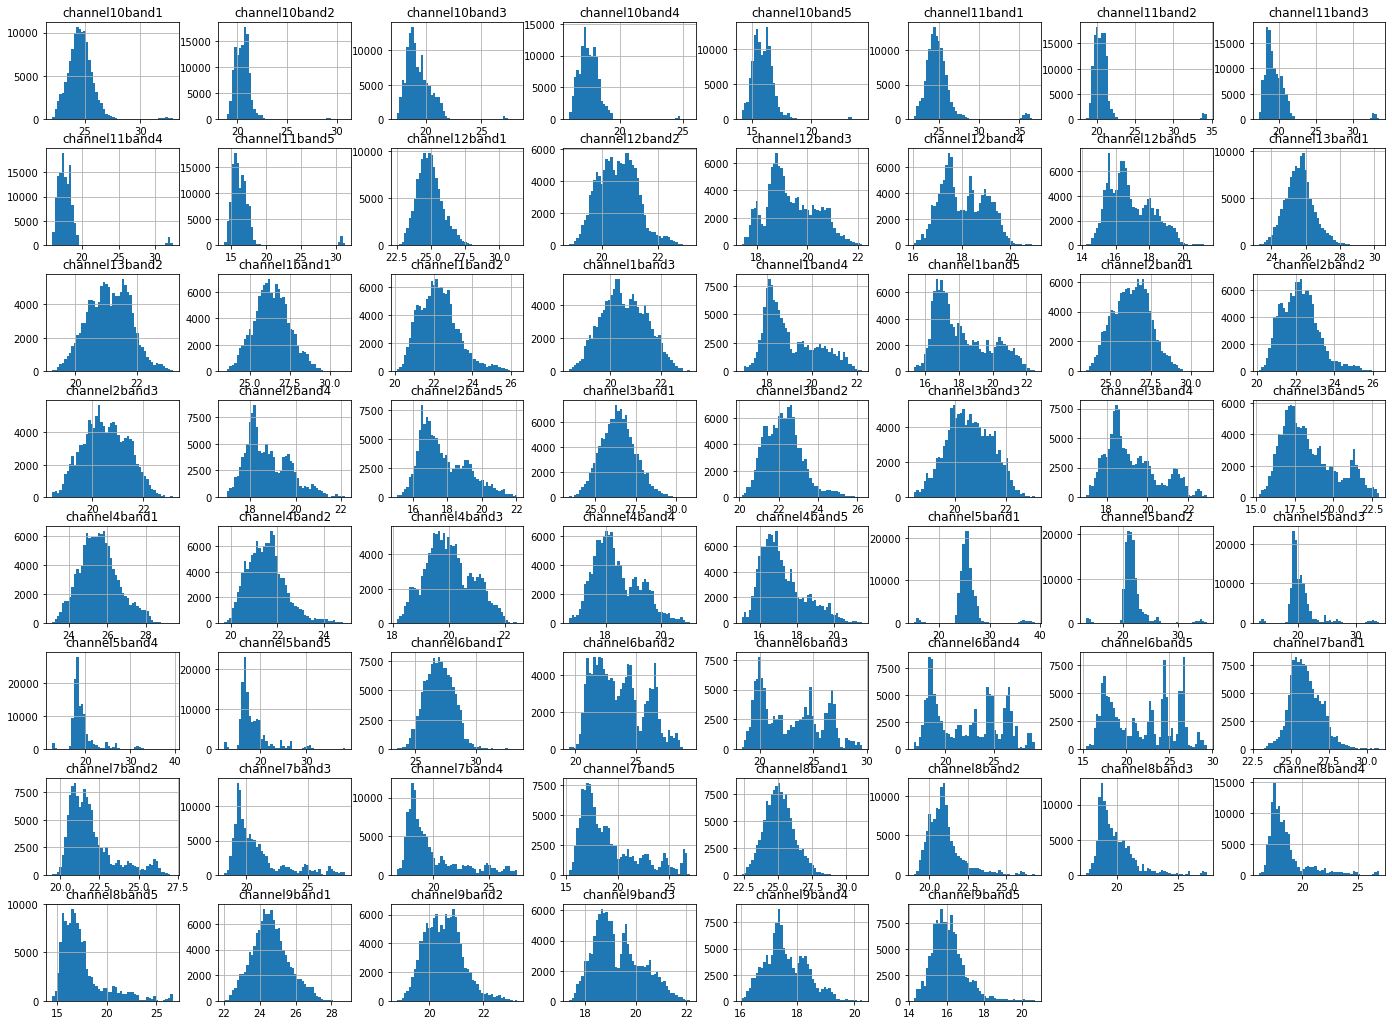

In [40]:
data.iloc[:,1:63].hist(bins=50, figsize=(24,18)) 
plt.show()

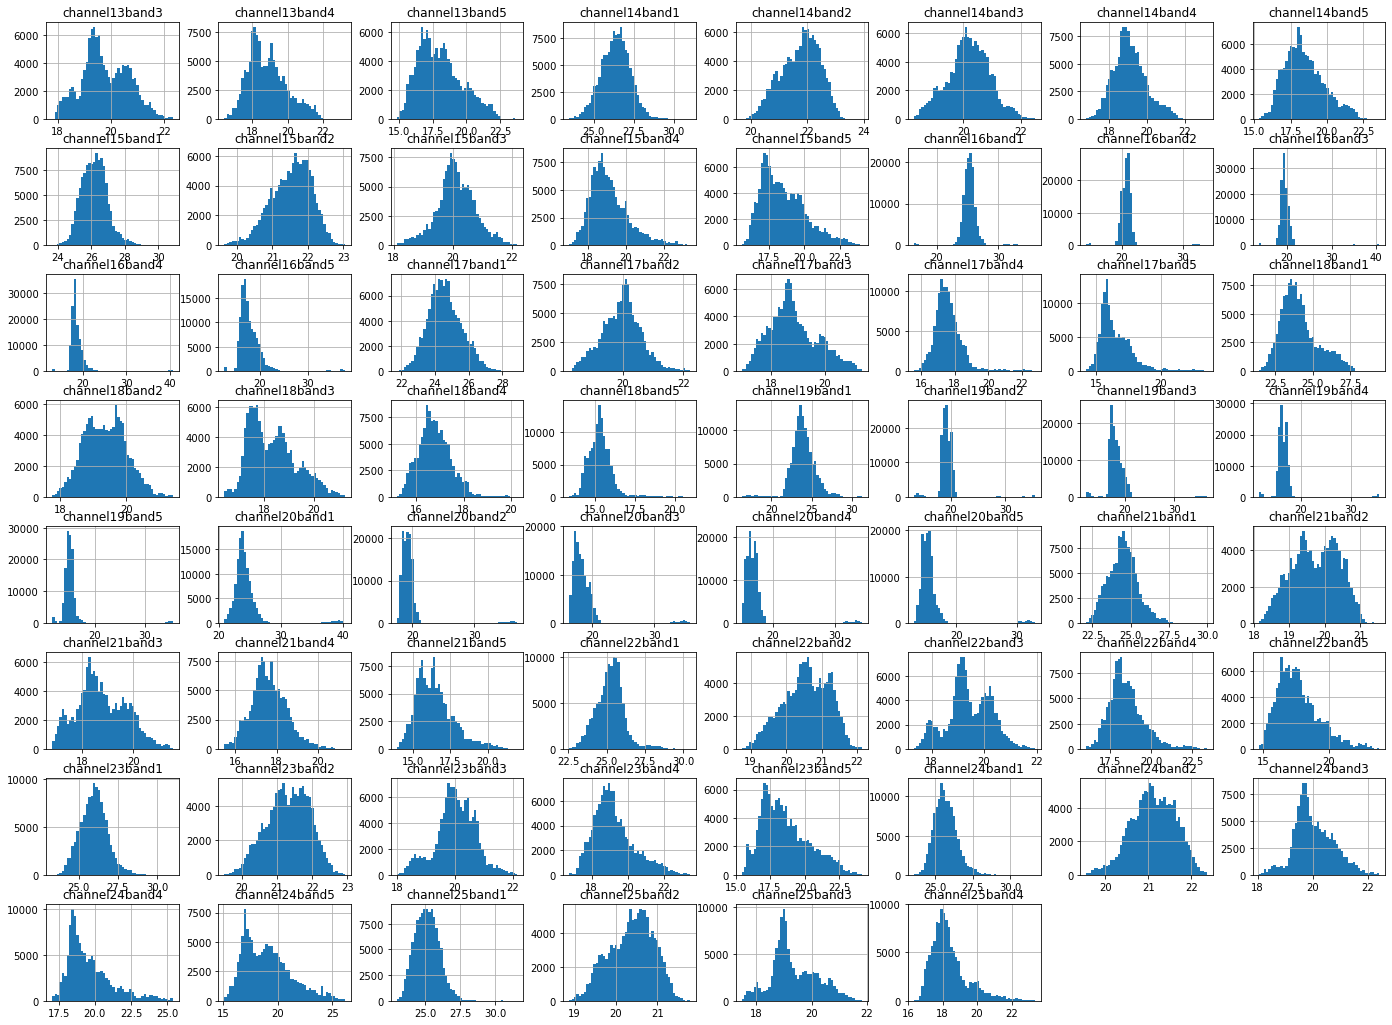

In [41]:
data.iloc[:,63:125].hist(bins=50, figsize=(24,18)) 
plt.show()

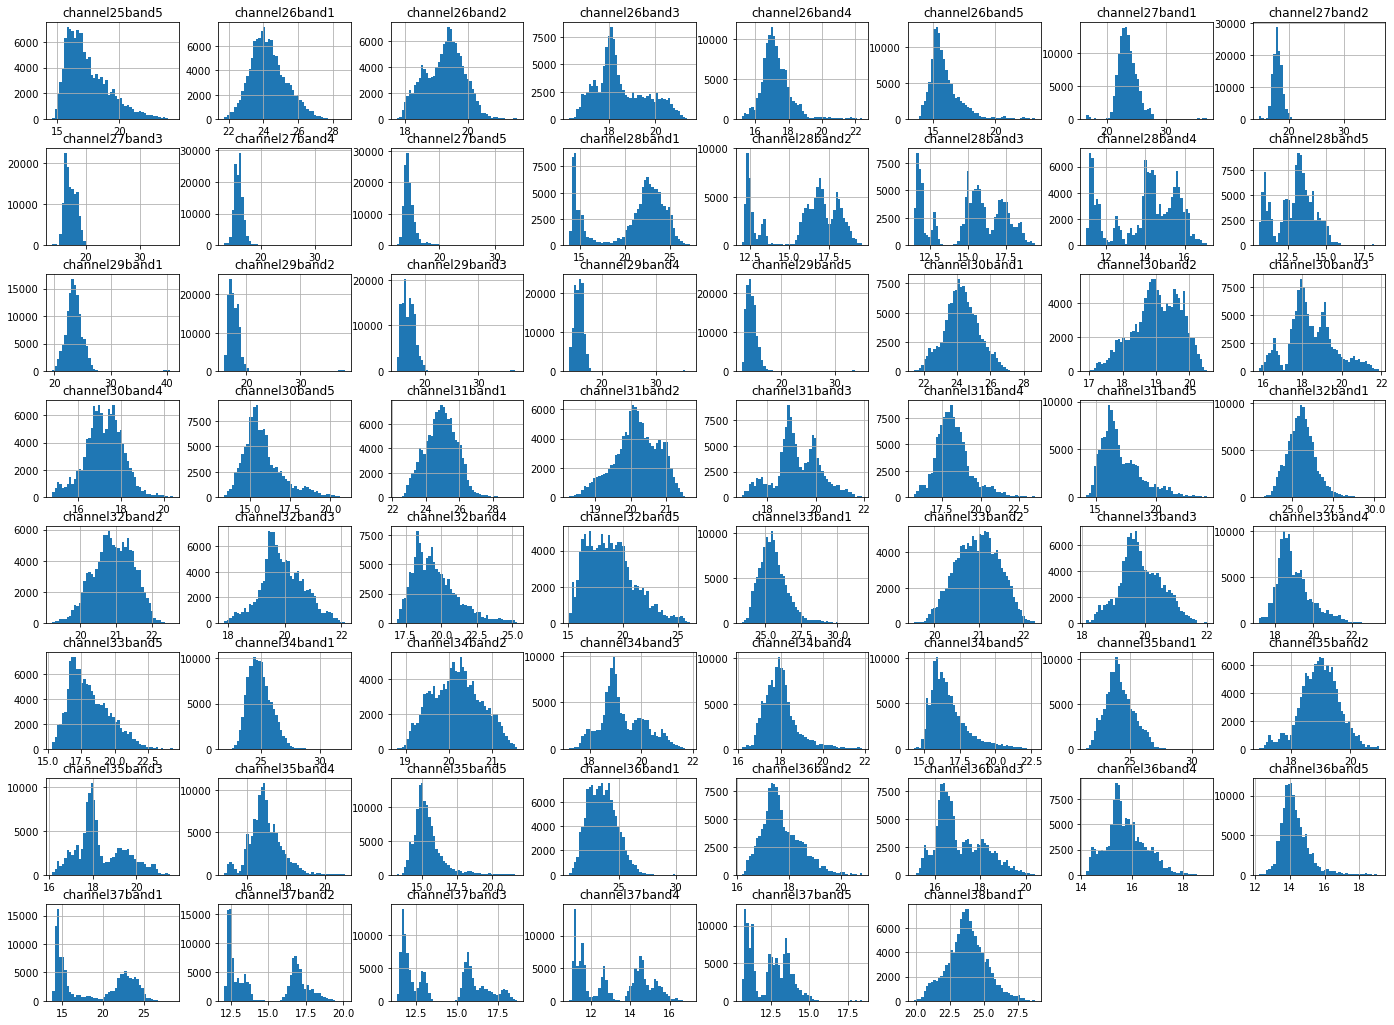

In [42]:
data.iloc[:,125:187].hist(bins=50, figsize=(24,18)) 
plt.show()

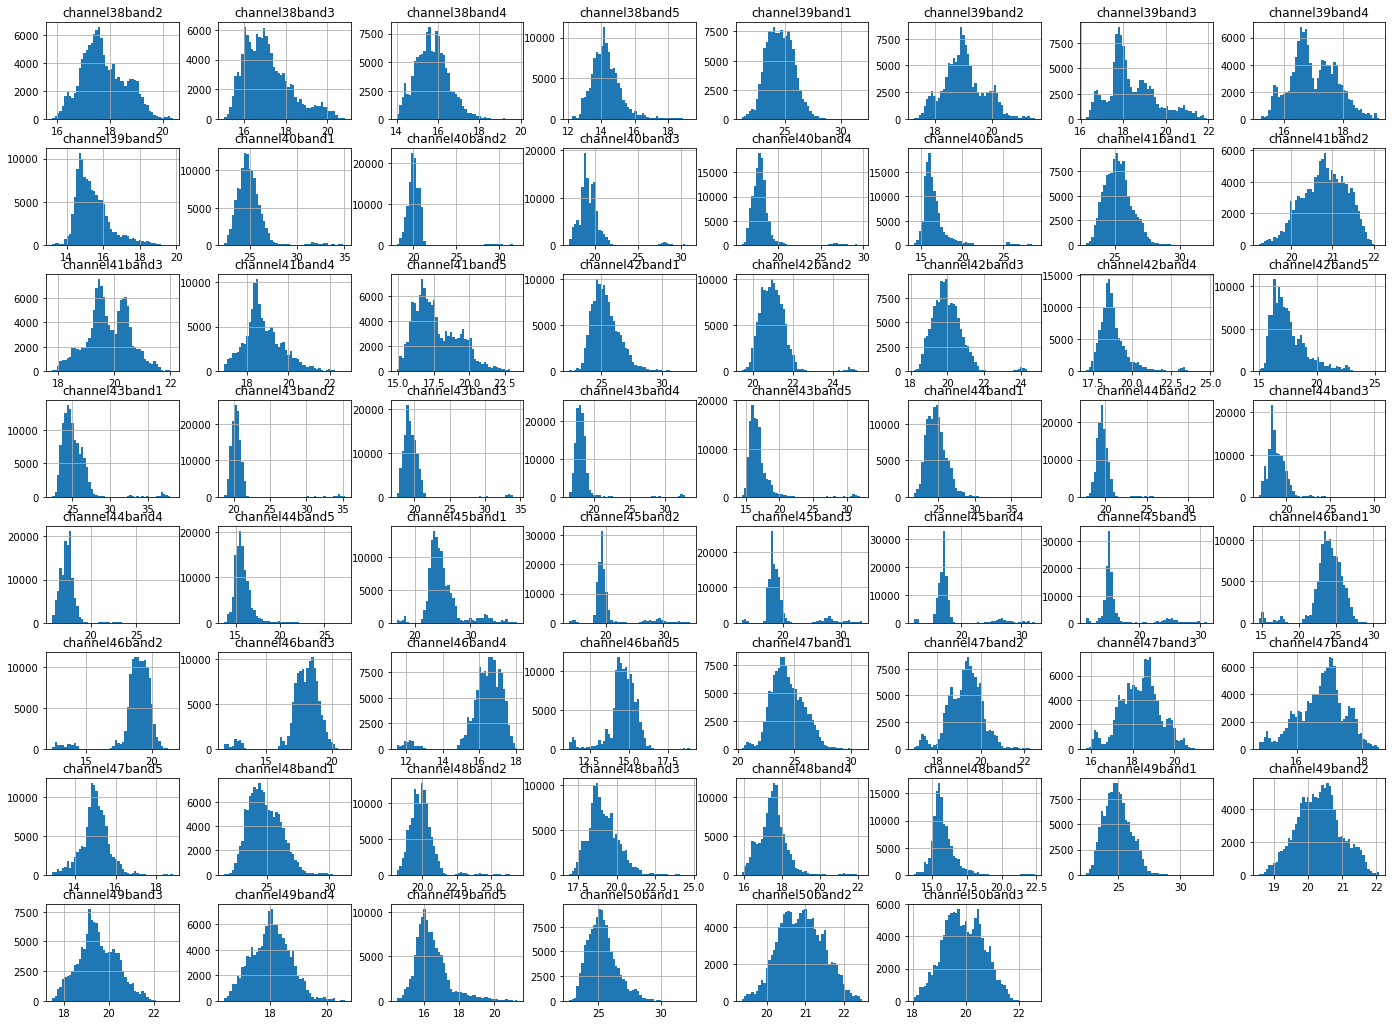

In [43]:
data.iloc[:,187:249].hist(bins=50, figsize=(24,18)) 
plt.show()

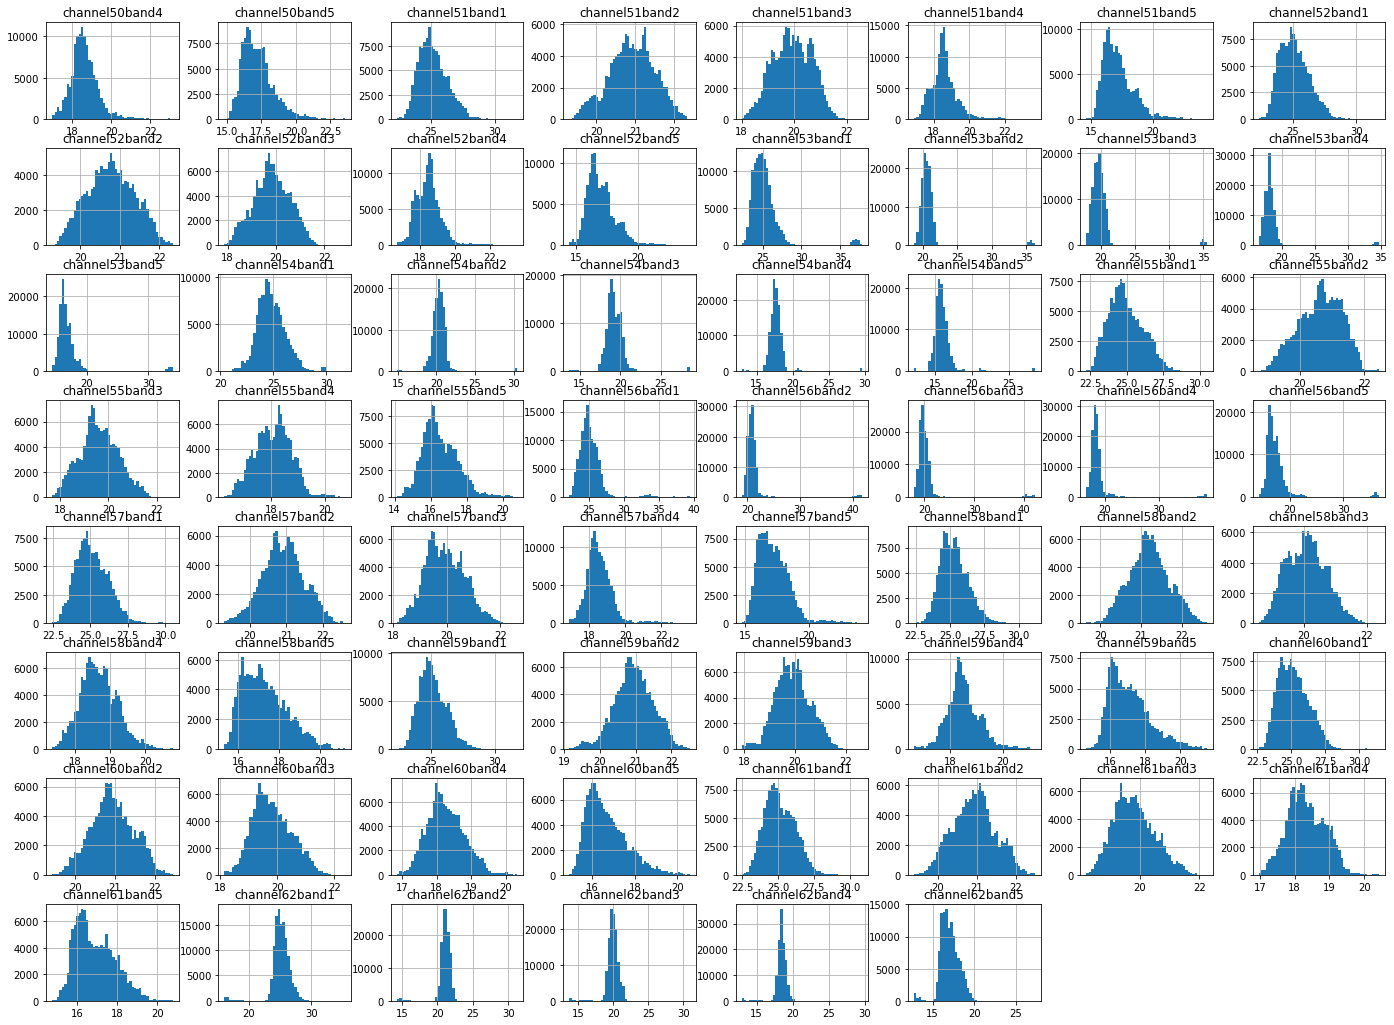

In [44]:
data.iloc[:,249:311].hist(bins=50, figsize=(24,18)) 
plt.show()

In [6]:
corr_matrix = data.corr()

In [55]:
corr_matrix["labels"].sort_values(ascending=False)

labels            1.000000
channel24band5    0.491378
channel24band4    0.475570
channel32band5    0.444926
channel32band4    0.442111
                    ...   
channel30band1   -0.053313
channel39band1   -0.054540
channel19band1   -0.054584
channel10band1   -0.061129
channel2band5    -0.078920
Name: labels, Length: 311, dtype: float64

In [6]:
corr = data.corr()

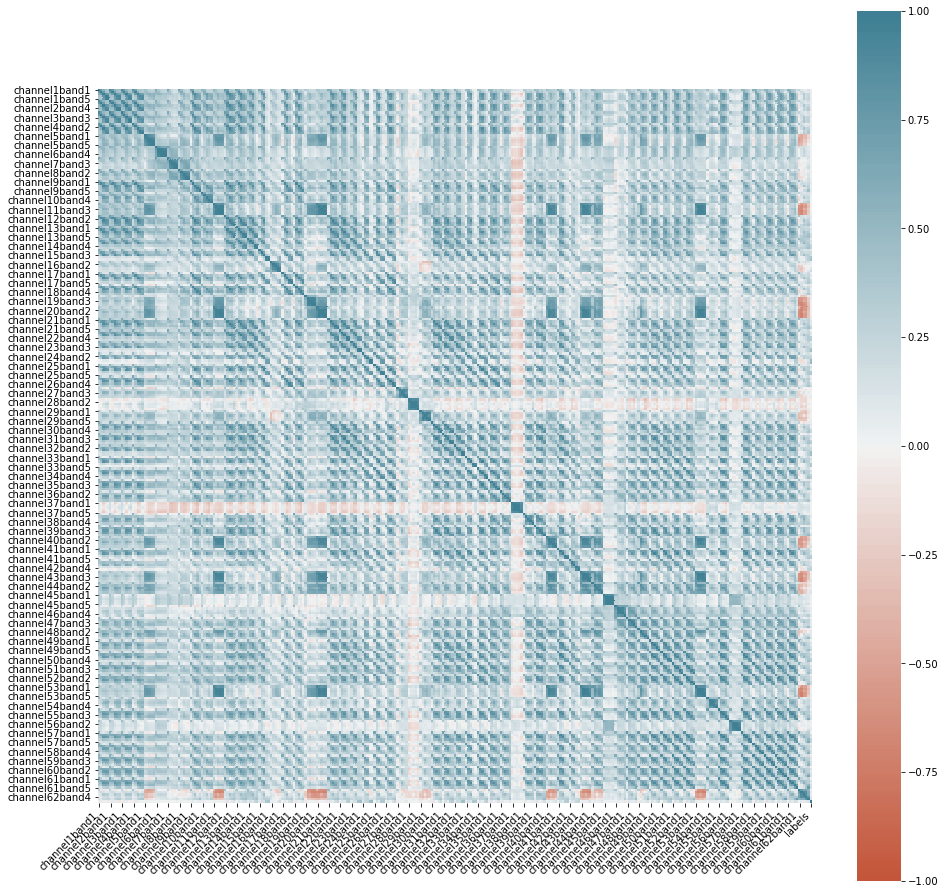

In [120]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,16))    
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [7]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

In [8]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


['channel1band5', 'channel2band2', 'channel2band3', 'channel2band5', 'channel3band2', 'channel3band3', 'channel3band5', 'channel4band2', 'channel4band3', 'channel5band4', 'channel5band5', 'channel6band3', 'channel6band4', 'channel6band5', 'channel7band4', 'channel7band5', 'channel8band5', 'channel9band3', 'channel11band4', 'channel11band5', 'channel12band3', 'channel13band3', 'channel14band3', 'channel15band5', 'channel18band3', 'channel19band4', 'channel19band5', 'channel20band2', 'channel20band3', 'channel20band4', 'channel20band5', 'channel21band3', 'channel22band3', 'channel23band5', 'channel24band5', 'channel26band3', 'channel28band3', 'channel28band4', 'channel29band4', 'channel31band3', 'channel32band5', 'channel34band3', 'channel35band3', 'channel37band3', 'channel37band4', 'channel39band3', 'channel40band3', 'channel43band2', 'channel43band3', 'channel43band4', 'channel45band3', 'channel45band4', 'channel45band5', 'channel46band4', 'channel50band3', 'channel52band3', 'channel

In [9]:
df = data.drop(labels = to_drop, axis = 1)

In [10]:
df

,Unnamed: 0.1,channel1band1,channel1band2,channel1band3,channel1band4,channel2band1,channel2band4,channel3band1,channel3band4,channel4band1,...,channel60band5,channel61band1,channel61band4,channel61band5,channel62band1,channel62band2,channel62band3,channel62band4,channel62band5,labels
0,R1_1_1_1,27.690652,23.304470,20.474486,18.149782,27.638452,18.078391,28.002040,18.784961,25.959379,...,17.594891,26.222695,18.140681,17.188848,26.162447,21.669390,19.941876,18.365300,16.996037,1.0
1,R1_1_1_2,27.681841,23.291268,20.472048,18.150560,27.625786,18.079903,27.985881,18.785691,25.944277,...,17.589876,26.217375,18.143698,17.186763,26.150286,21.664427,19.935365,18.367731,16.993784,1.0
2,R1_1_1_3,27.675038,23.281910,20.470404,18.152180,27.617062,18.082122,27.970902,18.786763,25.928672,...,17.585385,26.212647,18.146817,17.184404,26.137390,21.660778,19.929424,18.369899,16.991492,1.0
3,R1_1_1_4,27.672559,23.276374,20.467976,18.154491,27.612179,18.085136,27.958363,18.787871,25.916259,...,17.582037,26.210959,18.149587,17.183173,26.129884,21.657364,19.922379,18.371922,16.990375,1.0
4,R1_1_1_5,27.671900,23.272510,20.466660,18.156205,27.608150,18.087604,27.948162,18.788885,25.905479,...,17.579252,26.211905,18.152204,17.182695,26.125392,21.652414,19.914657,18.373481,16.989752,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40495,R3_15_15_176,26.459121,21.992051,20.842066,20.323499,26.024143,19.788678,25.975327,19.939022,25.595224,...,16.731225,23.241125,19.024547,17.106472,23.262812,21.006231,20.312838,19.020505,17.111832,-1.0
40496,R3_15_15_177,26.455834,21.993933,20.843976,20.325002,26.022664,19.791421,25.974203,19.940881,25.592005,...,16.731126,23.237870,19.026313,17.107176,23.259559,21.006189,20.314376,19.022409,17.112442,-1.0
40497,R3_15_15_178,26.452412,21.996336,20.844976,20.325729,26.019617,19.793439,25.970629,19.942585,25.591699,...,16.730457,23.236723,19.027017,17.107845,23.258468,21.007381,20.316344,19.023261,17.112996,-1.0
40498,R3_15_15_179,26.449032,21.999961,20.846837,20.326952,26.016566,19.795522,25.970013,19.944160,25.589994,...,16.729442,23.236529,19.026164,17.107560,23.258273,21.008644,20.317127,19.022514,17.112571,-1.0


### Dropped Features 

In [56]:
D_X_train, D_X_test, D_y_train, D_y_test = train_test_split(df.iloc[:,1:244], df.iloc[:,244], shuffle = True, test_size=0.2, random_state=1)
D_X_train, D_X_val, D_y_train, D_y_val = train_test_split(D_X_train, D_y_train, shuffle = True, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

### Train - Validation - Test 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:311], data.iloc[:,311], shuffle = True, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle = True, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

## PCA 

In [60]:
from sklearn.decomposition import PCA 

In [67]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_) 
d = np.argmax(cumsum >= 0.95) + 1
d

27

In [68]:
pca = PCA(n_components = d)

In [70]:
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [71]:
std_scaler = preprocessing.StandardScaler()
std_scaler_train_X = std_scaler.fit_transform(X_train)
std_scaler_test_X = std_scaler.transform(X_test)

### PCA and Standardization 

In [72]:
log_reg = LogisticRegression(solver='liblinear', max_iter = 1000, penalty = "l1")
log_reg.fit(std_scaler_train_X , y_train)

print("Train Acc", log_reg.score(std_scaler_train_X, y_train))
print("Test Acc", log_reg.score(std_scaler_test_X, y_test))

Train Acc 0.676954732510288
Test Acc 0.5888888888888889


### Normalization

In [34]:
normalizer = preprocessing.Normalizer()
normalized_train_X = normalizer.fit_transform(X_train)
normalized_test_X = normalizer.transform(X_test)

# Logistic Regression

C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In [13]:
from sklearn.linear_model import LogisticRegression

### Without Normalization and Standardization 

In [19]:
log_reg = LogisticRegression(solver='liblinear', max_iter = 1000)

In [20]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [21]:
pred = log_reg.predict(X_test)

In [22]:
log_reg.score(X_train, y_train)

0.9533333333333334

In [23]:
log_reg.score(X_test, y_test)

0.9509053497942387

In [24]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

[[7479  652   55]
 [ 375 7602   25]
 [  48   38 8026]]
              precision    recall  f1-score   support

        -1.0       0.95      0.91      0.93      8186
         0.0       0.92      0.95      0.93      8002
         1.0       0.99      0.99      0.99      8112

    accuracy                           0.95     24300
   macro avg       0.95      0.95      0.95     24300
weighted avg       0.95      0.95      0.95     24300

0.9509053497942387


<AxesSubplot:>

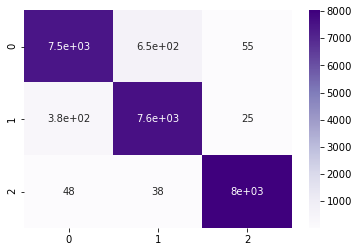

In [33]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, annot=True, cmap='Purples')

<AxesSubplot:>

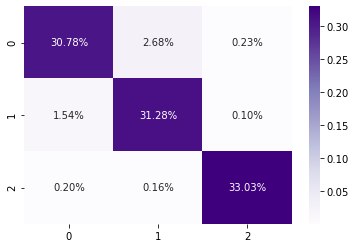

In [32]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Purples')

### Normalization 

In [35]:
log_reg.fit(normalized_train_X, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [36]:
pred = log_reg.predict(normalized_test_X)
print("Train Acc", log_reg.score(normalized_train_X, y_train))
print("Test Acc", log_reg.score(normalized_test_X, y_test))

Train Acc 0.6402331961591221
Test Acc 0.6353086419753087


### Standardization

In [39]:
log_reg.fit(std_scaler_train_X, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [40]:
pred = log_reg.predict(std_scaler_test_X)
print("Train Acc", log_reg.score(std_scaler_train_X, y_train))
print("Test Acc", log_reg.score(std_scaler_test_X, y_test))

Train Acc 0.9550891632373114
Test Acc 0.9514814814814815


<AxesSubplot:>

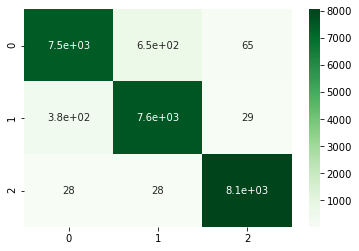

In [43]:
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, annot=True, cmap='Greens')

<AxesSubplot:>

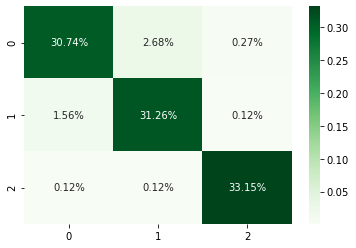

In [44]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')

In [45]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

[[7470  651   65]
 [ 378 7595   29]
 [  28   28 8056]]
              precision    recall  f1-score   support

        -1.0       0.95      0.91      0.93      8186
         0.0       0.92      0.95      0.93      8002
         1.0       0.99      0.99      0.99      8112

    accuracy                           0.95     24300
   macro avg       0.95      0.95      0.95     24300
weighted avg       0.95      0.95      0.95     24300

0.9514814814814815


In [47]:
log_reg = LogisticRegression(solver='liblinear', max_iter = 1000, penalty = "l1")
log_reg.fit(std_scaler_train_X, y_train)

print("Train Acc", log_reg.score(std_scaler_train_X, y_train))
print("Test Acc", log_reg.score(std_scaler_test_X, y_test))

Train Acc 0.9588203017832647
Test Acc 0.9567489711934156


In [48]:
pred = log_reg.predict(std_scaler_test_X)

<AxesSubplot:>

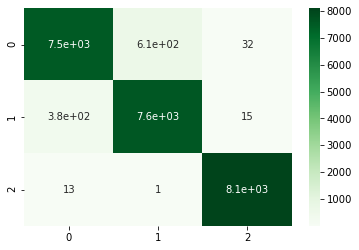

In [49]:
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, annot=True, cmap='Greens')

<AxesSubplot:>

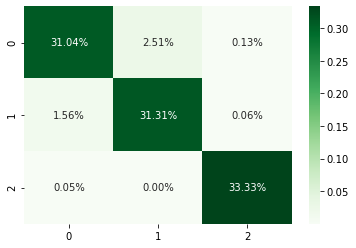

In [50]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')

### Band #1 

In [51]:
clf = LogisticRegression(solver='liblinear', max_iter = 1000, penalty = "l1").fit(std_scaler_train_X[:, 0:310:5], y_train)
print(clf.score(std_scaler_train_X[:, 0:310:5], y_train))
print(clf.score(std_scaler_test_X[:, 0:310:5], y_test))

0.5704252400548697
0.5709465020576132


In [52]:
clf = LogisticRegression(solver='liblinear', max_iter = 1000, penalty = "l1").fit(std_scaler_train_X[:, 1:310:5], y_train)
print(clf.score(std_scaler_train_X[:, 1:310:5], y_train))
print(clf.score(std_scaler_test_X[:, 1:310:5], y_test))

0.5883539094650205
0.5918930041152264


In [53]:
clf = LogisticRegression(solver='liblinear', max_iter = 1000, penalty = "l1").fit(std_scaler_train_X[:, 2:310:5], y_train)
print(clf.score(std_scaler_train_X[:, 2:310:5], y_train))
print(clf.score(std_scaler_test_X[:, 2:310:5], y_test))

0.6069410150891632
0.6036625514403292


In [54]:
clf = LogisticRegression(solver='liblinear', max_iter = 1000, penalty = "l1").fit(std_scaler_train_X[:, 3:310:5], y_train)
print(clf.score(std_scaler_train_X[:, 3:310:5], y_train))
print(clf.score(std_scaler_test_X[:, 3:310:5], y_test))

0.7022496570644718
0.7004115226337448


In [55]:
clf = LogisticRegression(solver='liblinear', max_iter = 1000, penalty = "l1").fit(std_scaler_train_X[:, 4:310:5], y_train)
print(clf.score(std_scaler_train_X[:, 4:310:5], y_train))
print(clf.score(std_scaler_test_X[:, 4:310:5], y_test))

0.7309053497942387
0.7230864197530864


### Dropped Features and Standardization

In [74]:
std_scaler = preprocessing.StandardScaler()
std_scaler_train_X = std_scaler.fit_transform(D_X_train)
std_scaler_test_X = std_scaler.transform(D_X_test)

In [75]:
log_reg = LogisticRegression(solver='liblinear', max_iter = 1000, penalty = "l1")
log_reg.fit(std_scaler_train_X , D_y_train)

print("Train Acc", log_reg.score(std_scaler_train_X, D_y_train))
print("Test Acc", log_reg.score(std_scaler_test_X, D_y_test))

Train Acc 0.942318244170096
Test Acc 0.941358024691358
